# 📊 Projeto de Análise Estatística de Produtos de Supermercado

Este projeto tem como objetivo explorar e analisar um conjunto de dados de produtos de supermercado,
focando especialmente nos preços e descontos aplicados.  
A análise busca responder a perguntas como:

- Quais categorias apresentam maior variação de preços?  
- Existem outliers que impactam a média e mediana de determinados grupos?  
- Quais marcas e categorias oferecem os maiores descontos médios?  
- Como os preços com desconto se relacionam com os preços originais?  

Além disso, a investigação utiliza técnicas de estatística descritiva, visualizações gráficas e análise exploratória de dados
para identificar padrões, anomalias e possíveis insights que possam ser úteis em estratégias comerciais e de precificação.


Os campos do nosso dataframe são:

Title: Nome do produto.

Marca: A marca do produto.

Preco_Normal: O preço em que o produto costuma ser vendido quando não há desconto.

Preco_Desconto: O preço vendido após o desconto ser aplicado.

Preco_Anterior: Preço em que era comercializado o produto antes do desconto aplicado.

Desconto: Total de desconto aplicado.

As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.

As categorias estão em espanhol!

In [87]:
#importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#carregando dataset
df = pd.read_csv('/content/MODULO7_BASE_SUPERMERCADO')

display(df)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
...,...,...,...,...,...,...,...
1102,"Helado bresler pote cassata 2,4l",Bresler,0,4359,5449,1090,congelados
1103,"Helado Trisabor chocolate lúcuma y manjar 2,4 L",Bresler,0,4359,5449,1090,congelados
1104,Shampoo Reconstrucción Completa 400 ml,Dove,0,2690,3849,1159,belleza-y-cuidado-personal
1105,Acondicionador Hidratación Intensa 400 ml,Dove,0,2690,3849,1159,belleza-y-cuidado-personal


In [88]:
# Verificando a quantidade de linhas
print("linhas da base de dados\n", len(df),"\n")

# Verificando a presença de valores nulos
print("Valores nulos encontrados\n", df.isnull().sum(),"\n")

# Verificando a categoria dos dados
print("Categorias dos dados\n", df.dtypes, "\n")

# Conferindo itens para traduzir
print("title: \n",df['title'].unique(), "\n")
# Demasiado itens !

print("Marcas: \n",df['Marca'].unique(), "\n")

print("Categorias: \n",df['Categoria'].unique())

linhas da base de dados
 1107 

Valores nulos encontrados
 title             0
Marca             0
Preco_Normal      0
Preco_Desconto    0
Preco_Anterior    0
Desconto          0
Categoria         0
dtype: int64 

Categorias dos dados
 title             object
Marca             object
Preco_Normal       int64
Preco_Desconto     int64
Preco_Anterior     int64
Desconto           int64
Categoria         object
dtype: object 

title: 
 ['Pack 12 un, Leche extra proteína 1 L'
 'Pack 12 un, Leche chocolate receta original 1 L'
 'Pack 12 un, Leche semidescremada chocolate 1 L' ...
 'Shampoo Reconstrucción Completa 400 ml'
 'Acondicionador Hidratación Intensa 400 ml'
 'Leche en Polvo Nido Forticrece Sin lactosa 1440g'] 

Marcas: 
 ['Loncoleche' 'Soprole' 'Colun' 'Plenitud' 'Nido' 'Tena' 'Cuisine & Co'
 'La Crianza' 'Svelty' 'Head & Shoulders' 'Sofruco' 'Listerine'
 'Receta Del Abuelo' 'Colgate' 'Calo' 'Surlat' 'San Jorge' 'Jumbo'
 'Elvive' 'San Francisco De Loncomilla' 'Turkey Hill' 'Maggi'
 '

In [89]:
# Tradução de Categorias
df['Categoria'] = df['Categoria'].replace('Llacteos', 'Produtos lácteos')
df['Categoria'] = df['Categoria'].replace('belleza-y-cuidado-personal', 'beleza e cuidados pessoais')
df['Categoria'] = df['Categoria'].replace('congelados', 'congelados')
df['Categoria'] = df['Categoria'].replace('frutas', 'frutas')
df['Categoria'] = df['Categoria'].replace('instantaneos-y-sopas', 'alimentos e sopas instantâneos')
df['Categoria'] = df['Categoria'].replace('comidas-preparadas', 'refeições preparadas')
df['Categoria'] = df['Categoria'].replace('verduras', 'verduras')

# Exibir o DataFrame atualizado para verificar
display(df)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
...,...,...,...,...,...,...,...
1102,"Helado bresler pote cassata 2,4l",Bresler,0,4359,5449,1090,congelados
1103,"Helado Trisabor chocolate lúcuma y manjar 2,4 L",Bresler,0,4359,5449,1090,congelados
1104,Shampoo Reconstrucción Completa 400 ml,Dove,0,2690,3849,1159,beleza e cuidados pessoais
1105,Acondicionador Hidratación Intensa 400 ml,Dove,0,2690,3849,1159,beleza e cuidados pessoais


In [90]:
# Observando as caracteristicas do dataframe
print("Estatísticas descritivas do DataFrame:\n")

print(df.describe())

Estatísticas descritivas do DataFrame:

       Preco_Normal  Preco_Desconto  Preco_Anterior     Desconto
count   1107.000000     1107.000000     1107.000000  1107.000000
mean    2070.997290      522.269196      372.257453    68.109304
std     2961.257627     1339.559852     1239.475017   241.158310
min        0.000000        0.000000        0.000000     0.000000
25%        0.000000        0.000000        0.000000     0.000000
50%     1269.000000        0.000000        0.000000     0.000000
75%     2849.000000        0.000000        0.000000     0.000000
max    19788.000000    14550.000000    18899.000000  4349.000000


In [91]:
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.
media_mediana = df.groupby('Categoria')['Preco_Normal'].agg(['mean', 'median']).reset_index()

media_mediana['diferenca'] = media_mediana['mean'] - media_mediana['median']
categorias_com_diferenca = media_mediana[media_mediana['diferenca'].abs() > 0]

display(categorias_com_diferenca) # Identificar categorias onde a média está acima ou abaixo da mediana
                                  # Podemos observar a diferença absoluta entre a média e a mediana



,Categoria,mean,median,diferenca
0,alimentos e sopas instantâneos,765.491228,439.0,326.491228
1,beleza e cuidados pessoais,1783.556485,1569.0,214.556485
2,congelados,2108.042553,1519.0,589.042553
3,frutas,1724.473684,1195.0,529.473684
4,lacteos,2385.219239,989.0,1396.219239
5,refeições preparadas,3095.043478,3290.0,-194.956522
6,verduras,1343.296875,1180.0,163.296875


In [92]:
#Traga o desvio padrão por categoria de produto.
#Qual o comportamento da média e mediana nas categorias com maior desvio?
desvio_padrão = df.groupby('Categoria')['Preco_Normal'].std()
print(desvio_padrão)

ordem = df.groupby("Categoria")["Preco_Normal"].std().sort_values(ascending=False)

# Obetemos o maior desvio padrão em sua categoria lactea.
# Temos a evidencia de muitos outliers inseridos entre os dados, elevando sua categoria media mediana.

Categoria
alimentos e sopas instantâneos    1170.232869
beleza e cuidados pessoais        2210.041719
congelados                        2111.539896
frutas                            1639.151114
lacteos                           3925.816164
refeições preparadas              2019.911428
verduras                          1012.699625
Name: Preco_Normal, dtype: float64



 Boxplot para a categoria 'lacteos':



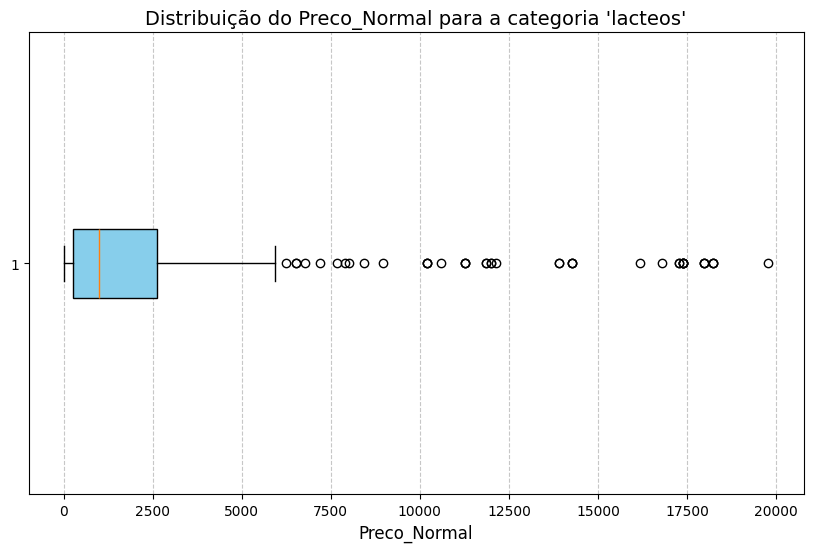


 Boxplot para a categoria 'beleza e cuidados pessoais':



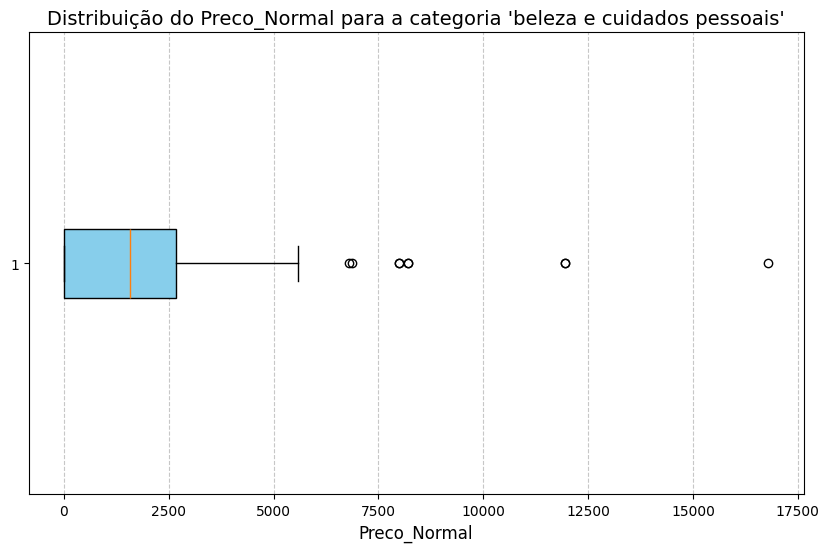


 Boxplot para a categoria 'congelados':



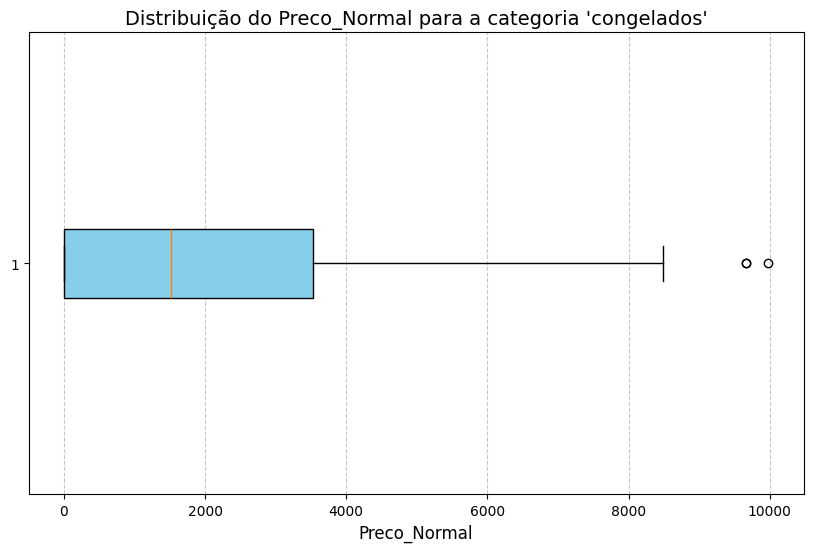


 Boxplot para a categoria 'frutas':



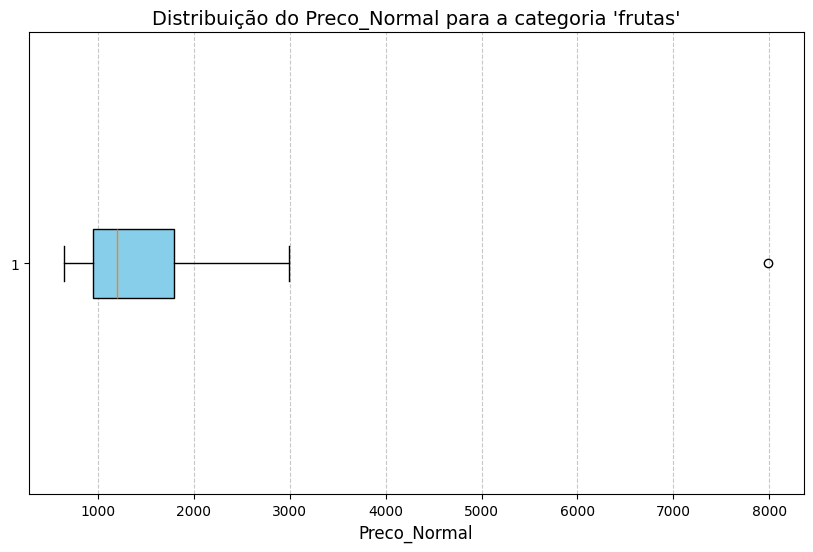


 Boxplot para a categoria 'refeições preparadas':



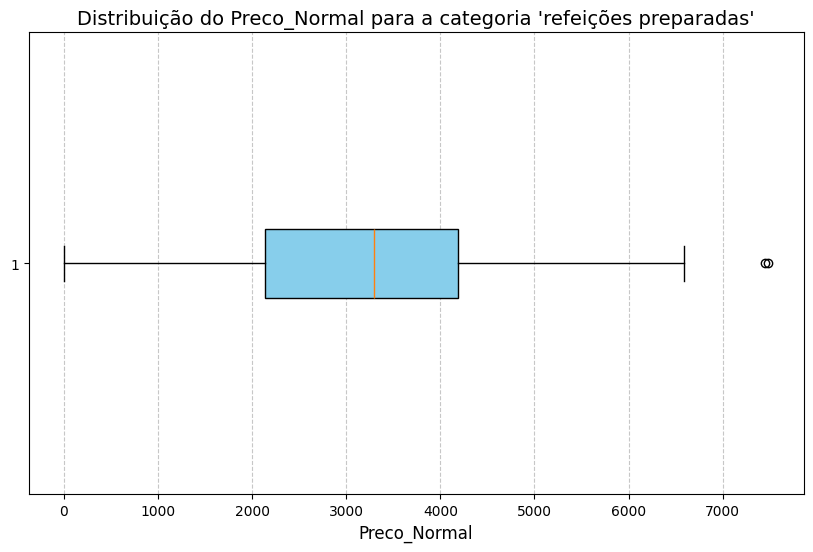


 Boxplot para a categoria 'verduras':



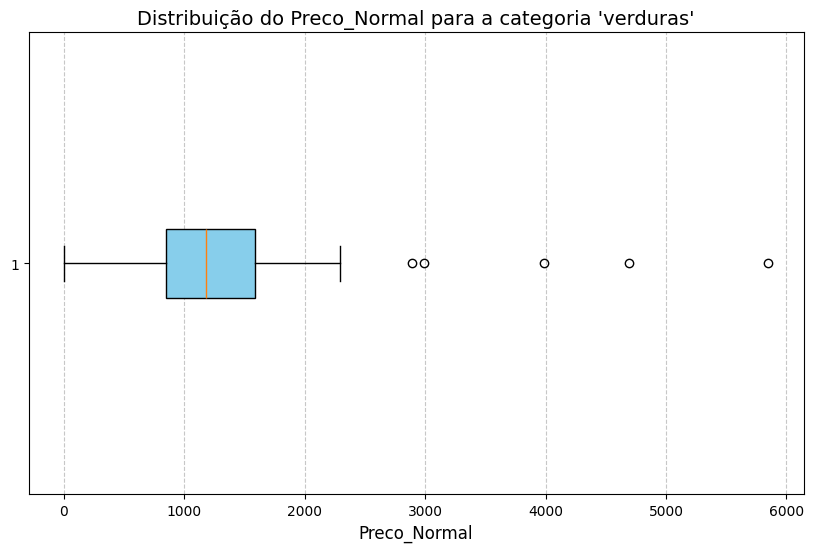


 Boxplot para a categoria 'alimentos e sopas instantâneos':



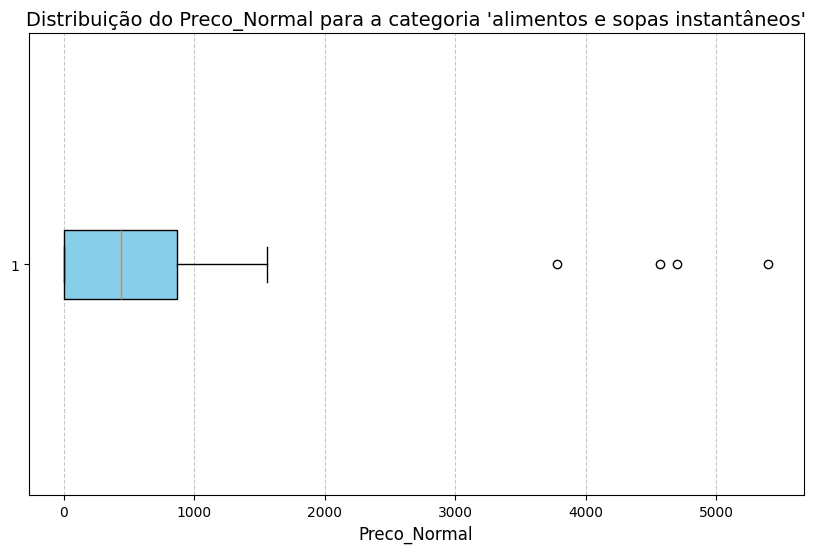

In [93]:
# Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

# All categorias
categorias = df['Categoria'].unique()

# Gerar um boxplot para cada categoria
# Gerando em lop
for categoria in categorias:
    print(f"\n Boxplot para a categoria '{categoria}':\n")
    plt.figure(figsize=(10, 6))
    filtered_data = df[df['Categoria'] == categoria]
    plt.boxplot(filtered_data["Preco_Normal"], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f"Distribuição do Preco_Normal para a categoria '{categoria}'", fontsize=14)
    plt.xlabel("Preco_Normal", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

Com base nos box plots gerados, podemos observar a distribuição do 'Preco_Normal' para cada categoria:

Distribuição: A caixa em cada gráfico representa o intervalo interquartil (IQR), com a linha interna indicando a mediana. Os "bigodes" (whiskers) se estendem para mostrar o intervalo dos dados, excluindo os outliers. A posição e o tamanho da caixa e dos "bigodes" nos informam sobre a dispersão e a assimetria dos dados em cada categoria.
Outliers: Os pontos individuais além dos "bigodes" em cada box plot representam potenciais outliers. Como você pode ver na maioria dos gráficos, particularmente na categoria 'lacteos', há vários pontos distantes dos "bigodes". Isso indica a presença de muitos outliers na coluna 'Preco_Normal' em várias categorias, com 'lacteos' apresentando um número significativo.
A presença desses outliers, especialmente na categoria 'lacteos', que também apresentou o maior desvio padrão, ajuda a explicar por que a média e a mediana foram diferentes em algumas categorias (como vimos anteriormente). Os outliers puxam a média em direção aos valores extremos, enquanto a mediana permanece uma medida mais robusta da tendência central na presença de tais valores extremos.

In [94]:
# Calcular o desconto médio por categoria
desconto_médio_por_categoria = df.groupby('Categoria')['Desconto'].mean().reset_index()

# Classifique as categorias por desconto médio para melhor visualização
desconto_médio_por_categoria = desconto_médio_por_categoria.sort_values(by='Desconto', ascending=False)

# Crie um gráfico de barras usando Plotly Express
fig = px.bar(desconto_médio_por_categoria, x='Categoria', y='Desconto',
             title='Média de Descontos por Categoria',
             labels={'Categoria': 'Categoria do Produto', 'Desconto': 'Média de Desconto'},
             color='Categoria')

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [95]:
# Calcule o desconto médio para cada combinação de Categoria e Marcaa
desconto_médio_por_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# gráfico (mapa de árvore usando Plotly Express)
fig = px.treemap(desconto_médio_por_categoria_marca,
                 path=['Categoria', 'Marca'],
                 values='Desconto',
                 title='Média de Descontos por Categoria e Marca',
                 labels={'Categoria': 'Categoria do Produto', 'Marca': 'Marca', 'Desconto': 'Média de Desconto'})

fig.show()

# 📈 Insights e Conclusões

Com base nas análises realizadas, destacam-se os seguintes pontos:

- **Dispersão de preços**: Algumas categorias, como *lácteos*, apresentam alta variabilidade de preços,
com forte presença de outliers que elevam o desvio padrão.  
- **Diferença entre média e mediana**: Em diversas categorias, a média é puxada por valores extremos,
enquanto a mediana se mostra uma medida mais robusta.  
- **Descontos por categoria e marca**: Foi possível identificar quais categorias recebem os maiores descontos médios
e quais marcas oferecem promoções mais frequentes ou mais agressivas.  
- **Relação preços e descontos**: Observou-se que, em geral, produtos com preços mais altos
tendem a receber descontos proporcionais maiores, possivelmente como estratégia de vendas.  

Esses insights podem apoiar decisões como:  
- Definição de promoções mais eficazes.  
- Identificação de categorias com maior sensibilidade a descontos.  
- Melhoria na precificação e no posicionamento de determinados produtos.  